In [40]:
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.datasets import load_digits

In [41]:
digits = load_digits()
type(digits)

sklearn.utils._bunch.Bunch

In [42]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [43]:
digits.data[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

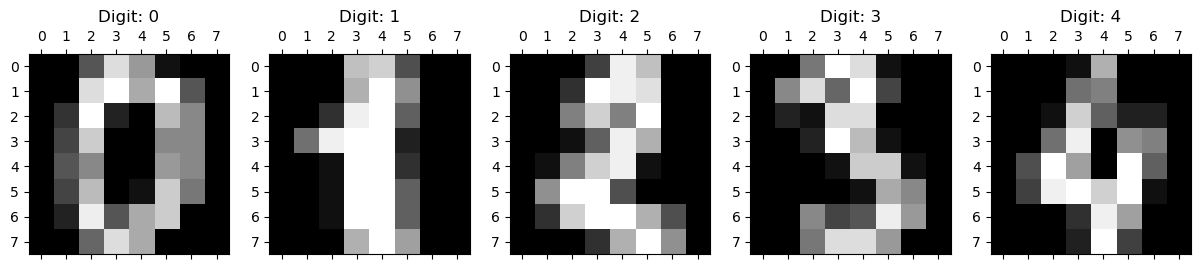

In [44]:
plt.gray()

fig,axes = plt.subplots(1,5,figsize = (15,3))

for i in range (5):
    axes[i].matshow(digits.images[i])
    axes[i].set_title('Digit: %i' % i)

In [45]:

print(digits.feature_names[0:5])
digits.target[0:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']


array([0, 1, 2, 3, 4])

In [46]:
from sklearn.model_selection import train_test_split


In [47]:
X_train, X_test, y_train, y_test =train_test_split(digits.data,digits.target,test_size=0.23,random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
model.fit(X_train,y_train)

c:\Anaconda\envs\dul01\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
model.score(X_test,y_test)

0.9734299516908212

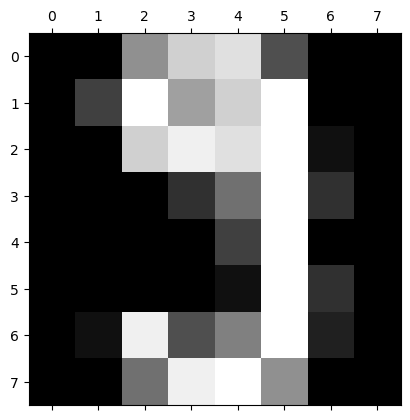

In [51]:
plt.matshow(digits.images[92])

In [52]:
digits.target[92]

9

In [53]:
model.predict([digits.data[92]])

array([9])

In [54]:
model.predict(digits.data[892:897])

array([2, 5, 7, 9, 5])

In [55]:
digits.target[892:897]

array([2, 5, 7, 9, 5])

In [59]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm


array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 52,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 36,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 41]], dtype=int64)

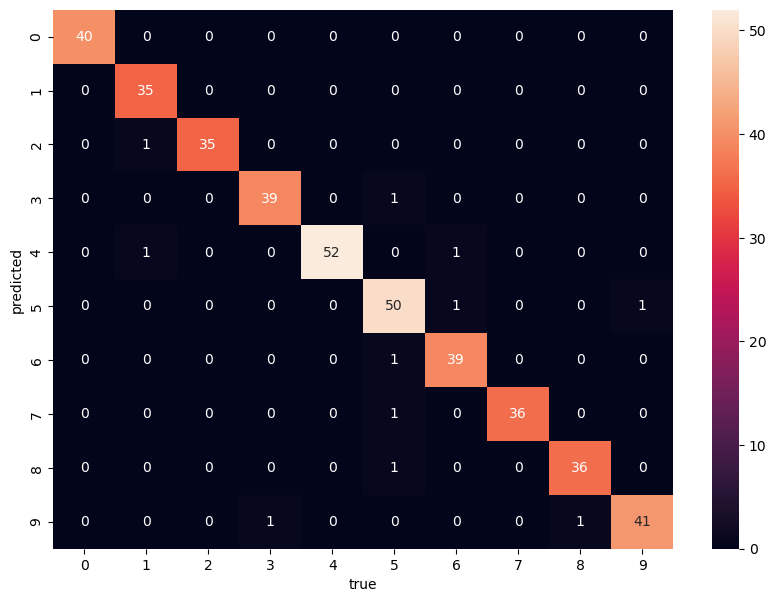

In [61]:
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('true')
plt.ylabel('predicted')
plt.show()